In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from copy import deepcopy
%matplotlib notebook

### Construieste graficul functiei patratice definite de matricea A si vectorul b
$$f:\mathbf{R}^n\longrightarrow\mathbf{R}, \quad f(x) = \frac{1}{2}x^T A x - b x$$

<IPython.core.display.Javascript object>


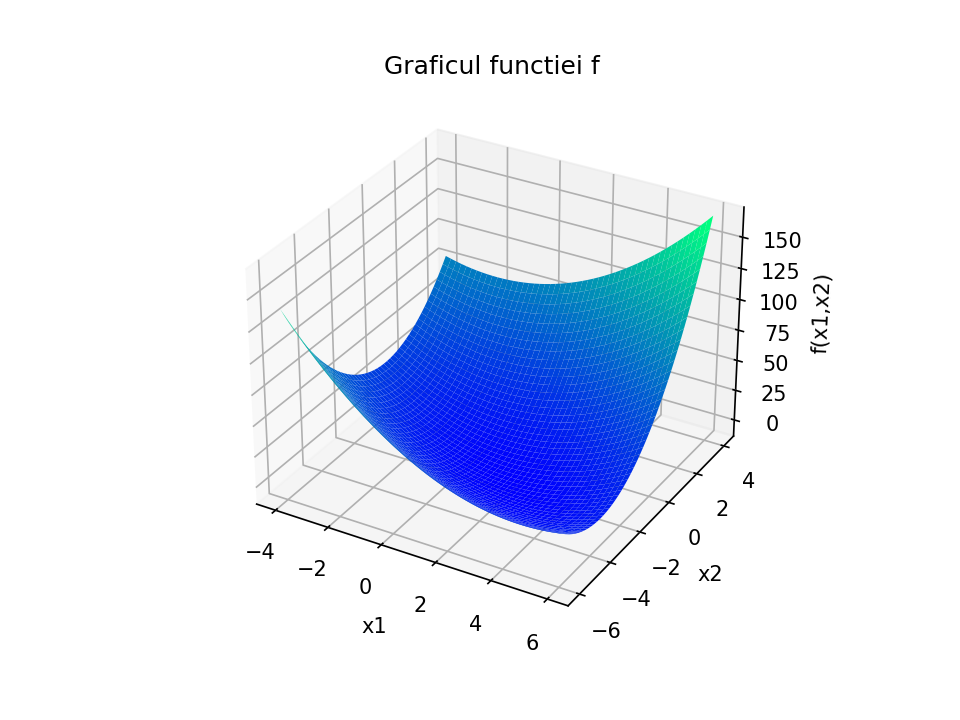

<IPython.core.display.Javascript object>


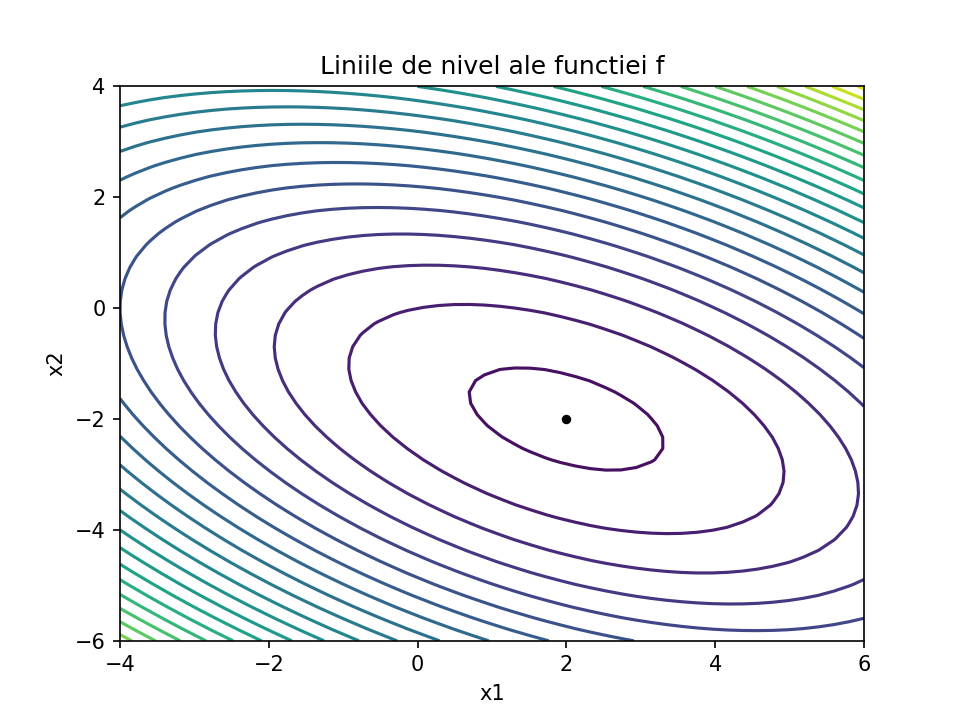

Numarul de iteratii:  50
Punctul de minim are coordonatele (2.000000,-2.000000) 


<IPython.core.display.Javascript object>


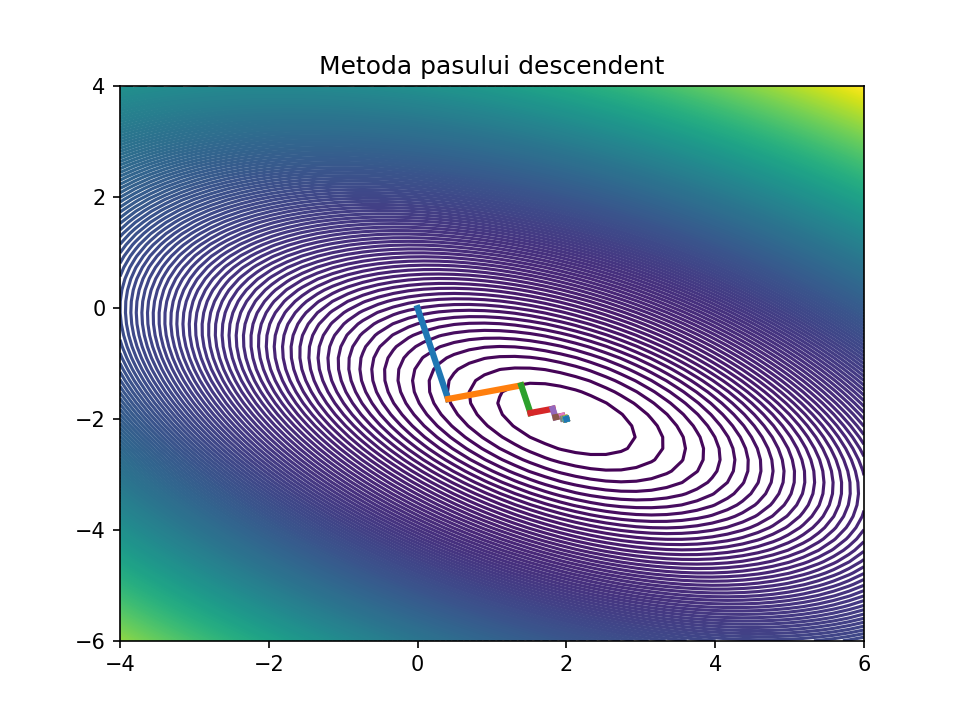

In [17]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 25) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()
    
    
def calculeaza_determinant(A):
    # Aplicam metoda Gauss cu pivotare totala
    m = A.shape[0]
    indices = np.arange(0, m)
    I = np.identity(m)
    A_extins = np.concatenate((A, I), axis = 1)
    s = 0 # numarul de schimbari de linii

    for k in range(0, m - 1):
        submatrice = A_extins[k:, k:m-1]
        (l, c) = np.unravel_index(submatrice.argmax(), submatrice.shape)
        l, c = l + k, c + k

        if l != k:
            s += 1

        if c != k:
            s += 1

        # Daca p != k atunci interschimbam liniile p si k, iar daca m != k interschimbam coloanele m si k
        A_extins[[l,k]] = A_extins[[k,l]]
        A_extins[:, [k, c]] = A_extins[:, [c, k]]
        # Schimbam indicii necunoscutelor
        indices[c], indices[k] = indices[k], indices[c]

        for i in range(k + 1, m):
            A_extins[i] = A_extins[i] - (A_extins[i][k] / A_extins[k][k]) * A_extins[k]


    U = np.copy(A_extins[0:m])

    determinant = 1.
    for i in range(m):
        determinant *= U[i][i]

    """
        Daca intr-o matrice patratica se schimba intre ele doua linii(sau coloane) se obtine o matrice care are
        determinantul egal cu opusul determinantului matricei initiale
    """
    determinant = (-1)**s * determinant
    
    return determinant


def pozitiv_definita(A):
    n = A.shape[0]
    for k in range(n):
        submatrice = deepcopy(A[:k+1][:k+1])
        det = calculeaza_determinant(submatrice)
        if det <= 0:
            print('Matricea A nu este pozitiv definita!')
            return False
        
    return True


def metoda_pasului_descendent(A, b, x, epsilon=1e-12):
    if (A != A.T).any() | (pozitiv_definita(A) == False):
        raise ValueError('Matrice A trebuie sa fie simetrica si pozitiv definita!')
    
    x_steps, k = [x], 0
    r = b - A @ x
    while np.linalg.norm(r) > epsilon:
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        r = b - A @ x
        k += 1
        
        if k > 1000:
            break
            
        x_steps.append(x)
    
    print('Numarul de iteratii: ', k)
    return x, x_steps


def vizualizare_pasi(A,b,steps):
    # Constructia gridului asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig = plt.figure()
    plt.contour(X1,X2,X3,levels=200)
    
    # Ploteaza pasii algoritmului
    for i in range(len(steps) - 1):
        plt.plot([steps[i][0], steps[i+1][0]], [steps[i][1], steps[i+1][1]], linestyle='-', linewidth=3)
        
    plt.title('Metoda pasului descendent')
    plt.show()
    
    
# Definire functie f prin matricea A si vectorul b
A = np.array([[3, 2],[2, 6]]).astype(float) # Matrice pozitiv definita
b = np.array([[2],[-8]]).astype(float)
x0 = np.array([[0], [0]]).astype(float)

# Apelare functii grafic
grafic_f(A,b)
linii_nivel(A,b)

# Punctul de minim determinat prin metoda pasului descendent(coborarea pe gradient)
(x_num, x_steps) = metoda_pasului_descendent(deepcopy(A),deepcopy(b),x0)
print('Punctul de minim are coordonatele (%f,%f) ' % (x_num[0], x_num[1]))
plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='.')
plt.show()

vizualizare_pasi(A,b,x_steps)